# Collect App Reviews

In this project we analyze user reviews of 10 of the most popular crypto related mobile apps (Google play store in this case). We provide some sentiment analysis. Check correlation between scores and sentiments of user reviews. And figure out which feelings prevails (and give some thought about what that means). At the end I left a summary of the project.

### Data Scrapping

In [1]:
#install dependencies
!pip install google-play-scraper

     |████████████████████████████████| 52 kB 688 kB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=d8216a0a4cf604ce4daca8c2a1154e65e9a9fc417fe0c7c1b681a26c30ce966a
  Stored in directory: /root/.cache/pip/wheels/81/37/0b/4a14be55b449a048cd93d79930b1a980dee7896480defa1923
Successfully built google-play-scraper


In [3]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 15.2 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 18.8 MB/s 
     |████████████████████████████████| 6.5 MB 11.6 MB/s 
     |████████████████████████████████| 895 kB 7.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 23.7 MB/s 


In [5]:
#import libraries
from google_play_scraper import Sort, reviews
from tqdm import tqdm 
import pandas as pd
import numpy as np
from transformers import pipeline
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
#create dictionary of crypto apps (names and ids)
crypto_dict = {'Crypto.com': 'co.mona.android', 
               'KuCoin': 'com.kubi.kucoin', 
               'Binance': 'com.binance.dev', 
               'Crypto Market Cap': 'com.zeykit.dev.cryptomarketcap', 
               'CoinGecko': 'com.coingecko.coingeckoapp', 
               'WazirX': 'com.wrx.wazirx', 
               'Crypto App': 'com.crypter.cryptocyrrency', 
               'Crypto News': 'com.cryptonews', 
               'Trust': 'com.wallet.crypto.trustapp', 
               'CoinMarketCap': 'com.coinmarketcap.android'
}

In [7]:
#reviews scrap function from google paly store
def scrap_app(app_id, app_name, country='us'):
  info, continuation_token = reviews(app_id, lang='en', country=country, count=100, sort=Sort.NEWEST)
  df = pd.DataFrame(np.array(info), columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  df['app'] = app_name
  df['country'] = country
  df['store_id'] = 'google play store'
  return df

In [8]:
result = pd.DataFrame()
for key, value in tqdm(crypto_dict.items()):
  data = scrap_app(value, key)
  result = result.append(data)

100%|██████████| 10/10 [00:02<00:00,  4.99it/s]


In [9]:
#check dataset shape
result.shape

(1000, 13)

In [10]:
result.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app,country,store_id
0,gp:AOqpTOGtqh3ZIGfbiMIjMR7raM3PuE9poV65mJvgU3d...,Raleigh Sugg,https://play-lh.googleusercontent.com/a-/AOh14...,Customer support is very busy but always helpf...,5,0,3.132.1,2022-04-07 09:32:56,None,NaT,Crypto.com,us,google play store
1,gp:AOqpTOFTTA_jG0UX2Dc6H4e9f3wbE-JKz3oWUquRmZQ...,Ravinder Singh gamer,https://play-lh.googleusercontent.com/a-/AOh14...,Nice pic,5,0,3.132.1,2022-04-07 09:01:40,None,NaT,Crypto.com,us,google play store
2,gp:AOqpTOHkKgfPkE4j2XtcAh4ckrz-kx81gzzYP78hYdb...,AltruisticMotion22,https://play-lh.googleusercontent.com/a-/AOh14...,DISCRIMINATORY PRACTICES! I'm not allowed as a...,1,0,None,2022-04-07 08:08:48,None,NaT,Crypto.com,us,google play store
3,gp:AOqpTOFrnuNDLIV5U4RMuSdkD0FLffe_qe35rGuDhiv...,Boris Yelin,https://play-lh.googleusercontent.com/a/AATXAJ...,This app is so bad... when trying to transfer ...,1,0,None,2022-04-07 06:46:29,Hi Boris! We would appreciate it if you could ...,2022-04-07 07:25:55,Crypto.com,us,google play store
4,gp:AOqpTOHIalmmJWbEHiii7FifxUeW05n0o-N-LwobTNg...,Areli Ubeda,https://play-lh.googleusercontent.com/a-/AOh14...,Very disappointed my crypto got stolen,1,0,3.132.1,2022-04-07 06:46:01,Hello Areli! We welcome you to contact us thro...,2022-04-07 07:25:40,Crypto.com,us,google play store


In [11]:
reviews = result[['store_id', 'app', 'reviewId', 'content', 'score', 'userName', 'at', 'country']].reset_index(drop=True)

In [12]:
reviews = reviews.rename(columns={"content": "review", "reviewId": "review_id", "at": "timestamp", "country": "country_id", "userName": "username"})

In [13]:
reviews.head()

,store_id,app,review_id,review,score,username,timestamp,country_id
0,google play store,Crypto.com,gp:AOqpTOGtqh3ZIGfbiMIjMR7raM3PuE9poV65mJvgU3d...,Customer support is very busy but always helpf...,5,Raleigh Sugg,2022-04-07 09:32:56,us
1,google play store,Crypto.com,gp:AOqpTOFTTA_jG0UX2Dc6H4e9f3wbE-JKz3oWUquRmZQ...,Nice pic,5,Ravinder Singh gamer,2022-04-07 09:01:40,us
2,google play store,Crypto.com,gp:AOqpTOHkKgfPkE4j2XtcAh4ckrz-kx81gzzYP78hYdb...,DISCRIMINATORY PRACTICES! I'm not allowed as a...,1,AltruisticMotion22,2022-04-07 08:08:48,us
3,google play store,Crypto.com,gp:AOqpTOFrnuNDLIV5U4RMuSdkD0FLffe_qe35rGuDhiv...,This app is so bad... when trying to transfer ...,1,Boris Yelin,2022-04-07 06:46:29,us
4,google play store,Crypto.com,gp:AOqpTOHIalmmJWbEHiii7FifxUeW05n0o-N-LwobTNg...,Very disappointed my crypto got stolen,1,Areli Ubeda,2022-04-07 06:46:01,us


### Exploratory Data Analysis

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   store_id    1000 non-null   object        
 1   app         1000 non-null   object        
 2   review_id   1000 non-null   object        
 3   review      1000 non-null   object        
 4   score       1000 non-null   int64         
 5   username    1000 non-null   object        
 6   timestamp   1000 non-null   datetime64[ns]
 7   country_id  1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 62.6+ KB


In [15]:
reviews.describe()

,score
count,1000.000000
mean,3.804000
std,1.623644
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


No missing values. Distribution looks good but skewed to the left. Data types are appropriate.

### Sentiment Analysis

As model I use XLM-roBERTa-base model from huggingface - https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment?text=I+love+you%21. It's trained on ~198M tweets and finetuned for sentiment analysis. The sentiment fine-tuning was done on 8 languages (Ar, En, Fr, De, Hi, It, Sp, Pt. It also can be used for more languages) 

In [16]:
#import the model
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)


Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [17]:
#check how it works
pd.DataFrame(sentiment_task("Pathetically Slow"))

,label,score
0,Negative,0.929649


In [18]:
# sentiment score convert function
def sentiment_score(text):
  label = pd.DataFrame(sentiment_task(text))['label'][0]
  score = pd.DataFrame(sentiment_task(text))['score'][0]
  if label == 'Negative':
    new_score = score + 1
  elif label == 'Positive':
    new_score = score + 4
  else:
    new_score = score*2 + 2
  return new_score.round(1)

In [19]:
#check the function
sentiment_score('Hate it')

1.9

In [20]:
sentiment_score('Pretty cool app')

4.9

In [21]:
#add sentiment score column into dataset
reviews['sentiment_score'] = [sentiment_score(x) for x in reviews['review']]

In [29]:
reviews.to_csv('sentiment_reviews.csv')

In [81]:
reviews = pd.read_csv('sentiment_reviews.csv')

In [22]:
reviews.head()

,store_id,app,review_id,review,score,username,timestamp,country_id,sentiment_score
0,google play store,Crypto.com,gp:AOqpTOGtqh3ZIGfbiMIjMR7raM3PuE9poV65mJvgU3d...,Customer support is very busy but always helpf...,5,Raleigh Sugg,2022-04-07 09:32:56,us,4.9
1,google play store,Crypto.com,gp:AOqpTOFTTA_jG0UX2Dc6H4e9f3wbE-JKz3oWUquRmZQ...,Nice pic,5,Ravinder Singh gamer,2022-04-07 09:01:40,us,4.8
2,google play store,Crypto.com,gp:AOqpTOHkKgfPkE4j2XtcAh4ckrz-kx81gzzYP78hYdb...,DISCRIMINATORY PRACTICES! I'm not allowed as a...,1,AltruisticMotion22,2022-04-07 08:08:48,us,2.0
3,google play store,Crypto.com,gp:AOqpTOFrnuNDLIV5U4RMuSdkD0FLffe_qe35rGuDhiv...,This app is so bad... when trying to transfer ...,1,Boris Yelin,2022-04-07 06:46:29,us,1.9
4,google play store,Crypto.com,gp:AOqpTOHIalmmJWbEHiii7FifxUeW05n0o-N-LwobTNg...,Very disappointed my crypto got stolen,1,Areli Ubeda,2022-04-07 06:46:01,us,1.9


In [24]:
reviews.describe()

,score,sentiment_score
count,1000.000000,1000.00000
mean,3.804000,3.68240
std,1.623644,1.32939
min,1.000000,1.40000
25%,2.000000,1.90000
50%,5.000000,4.50000
75%,5.000000,4.80000
max,5.000000,4.90000


Median and mean values don't match. So we expect that score distributions are scewed to the left. It means there are many negative score.   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.95, 'User scores and review sentiment scores distributions')

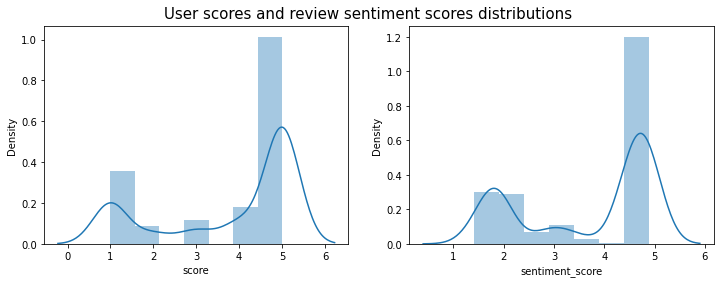

In [25]:
#plot score distributions
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(reviews['score'], ax=ax[0])
sns.distplot(reviews['sentiment_score'], ax=ax[1])
plt.suptitle('User scores and review sentiment scores distributions', fontsize=15, y=.95)

Both distributions look the same. They have two (low and high) peaks. So we can see that the most of the crypto users like apps. And they leaves their positive reviews. Distinctly lesser don't like. And they expresse their opinion either. Others apparently are satisfied, but usually say nothing.

### Check correlation between user scores and review sentiment scores

In [26]:
reviews.corr()

,score,sentiment_score
score,1.000000,0.743937
sentiment_score,0.743937,1.000000


As expected, user scores and review sentiment scores have strong correlation one to another.

## Summury:

In this project I collected user reviews of the most popular 10 crypto related apps from Google Play Store in USA. Provided sentiment analysis via XLM-roBERTa-base model from Huggingface. It's trained on ~198M tweets and finetuned for sentiment analysis. So I think it's a quite appropriate choice for our issue. Comparing user scores and review sentiment scores we can say that they have strong correlation one to another. It make sense, cause usually users expresses the same feelings in their ratings and comments. Also we can say that the most of the crypto users like apps. Both distribution have peaks at high scores. Distinctly lesser don't like. Others apparently are satisfied, but don't leaves any comments. The sentiment fine-tuning of our model was done on 8 languages. So in future projects we can do the similar things for each of the apps in different countries and in different languages. 